<a href="https://colab.research.google.com/github/shiqisim/Final-Project/blob/main/final_project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning and Neural Networks: Deep Learning on a public dataset


#1. Introduction


Breast cancer is a common disease that has affected numerous women around the world. It is often not easy to detect if one has breast cancer in the early stages as there may not be any symptoms. Hence, it is important for early detection to occur to prevent further deaths. This disease happens when there is lining cells of the ducts or lobules in the glandular tissue of the breast [1]. This type of cancer has a high treatment rate if detected early and before the cancerous cells spread to the other parts of the body.

In 2020, 2.3 million women were diagnosed with breast cancer and there were 685000 deaths around the world. This reflects how common this type of cancer is as it could occur at any age after puberty for women. Males could contract breast cancer too, but such cases are significantly lesser than the probability of a female contracting it. Statistics have shown how the survival rate of breast cancer for at least five years are more than 90% in high income countries, 66% in India and 40% in South Africa [1]. As a result, this project seeks to develop a deep learning model to assist the lower income countries with detecting the risk of one contracting breast cancer and to get treatment earlier. Healthcare systems should also be put in place in managing breast cancer cases through ‘referral pathways World Health Organisation [2021]’ to ease the complications surrounding it.

The aim of this project is to develop a deep learning model that explores multiple algorithms for predicting whether one is at a risk of getting breast cancer and to implement the best algorithm. For example, Convolutional Neural Networks (CNN), Artificial Neural Network (ANN) and Residual Neural Network (RNN). Subsequently, it should also classify, detect and conduct segmentation on the breast ultrasound images for predicting breast cancer, as well as perform evaluation on the different machine learning models.
The objectives would be to develop an original model with suitable depth, deliver a clear and concise analysis that is well documented, as well as an evaluation on the different models created.

#2. Defining the problem and assembling a dataset

This dataset, ""(Kaggle,) includes the medical images of breast cancer from ultrasound scans and it is categorised into three classes. They are malignant, benign and normal images. This data was collected in 2018 and the patients are aged between 25 and 75 years old and there are 600 person in total. The dataset consists of 780 images with an average image size of 500*500 pixels and in PNG format. The ground truth images are presented with original images. Hence, I would like to explore and perform segmentation of the ultrasound images to predict whether one has breast cancer. The data availability is sufficient for me to conduct segmentation of the images based on the three classes. The ground truth accuracy was also verified by the radiologists from Baheya and the incorrect annotation was fixed.

The problem about this dataset, however, is that it is a multi-class segmentation with single-label classification and the data is imbalanced. Thus, for the last-layer activation, I would be using 'softmax' and 'categorical_crossentropy' for the loss function. The input features would be all the images from the benign, normal and malignant class and the output would be the predictions of image that has been converted from categorical to numerical data using the one hot encoding technique. To resolve the imbalanced issue, class weights would be added during training.


#3. Choosing a measure of success

The metric of success for this model would be precision, recall, balanced accuracy score and f1-score. 'Precision is a metric that quantifies the number of correct positive predictions made.' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) 'It is calculated as the ratio of correctly predicted positive examples divided by the total number of positive examples that were predicted.' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) As for recall, it is 'a metric that quantifies the number of correct positive predictions made out of all positive predictions that could have been made' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) It 'provides an indication of missed positive predictions' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/) which is often 'used to measure the coverage of the minority class' (Page 27, Imbalanced Learning: Foundations, Algorithms, and Applications, 2013.). These two metrics are chosen with reference to the Deep Learning with Python book whereby it was stated that 'For
class-imbalanced problems, you can use precision and recall.' With  cross-validation with another source, it is evident that these two metrics are often used in classification models. (Javatpoint, no date)

Additionally, the balanced accuracy sccore is chosen as it is widely used in multiclass classification and issues of an imbalanced dataset. The definition for it is calculated as the average of recall in each class. Lastly, the f1-measure is selected as a metric in this project as it can 'combine both precision and recall into a single measure that captures both properties' (https://machinelearningmastery.com/precision-recall-and-f-measure-for-imbalanced-classification/). 'The F1-measure, which weights precision and recall equally, is the variant most often used when learning from imbalanced data.' Hence, this shows that this metric is useful for this imbalanced dataset and would aid me in the evaluation process. To determine the results of the metric, the best result would be defined as 1.0 and the worst would be 0.0.

#4. Deciding on an evaluation protocol

The evaluation protocols that I had chosen for this project would be maintaining a hold-out validation set and doing K-fold cross-validation. 'Hold-out is when you split up your dataset into a 'train' and 'test' set.' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f) 'The training set is what the model is trained on, and the test set is used to see how well that model performs on unseen data. ' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f) The splitting of the training and testing set would be '80% of data for training and the remaining 20% of the data for testing' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f)

On the other hand, for K-fold cross-validation, 'the procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into'. (https://machinelearningmastery.com/k-fold-cross-validation/) I have chosen this method as it is stated that it is 'simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split' (https://machinelearningmastery.com/k-fold-cross-validation/) In general, out of the groups, one would be used as test set whilst the reemaining would be the train set. 'The model is trained on the training set and scored on the test set.' (Eijaz, 2018)

The advantage of using the K-fold cross validation is that it is useful for data that is limited and prevents overfitting. The disadvantage, however, would be that it is computationally intensive as it will train and test the model continuously. For hold-out validation, the advantage would be that it has lesser computation costs, good for large datasets and building of first model. The disadvantage would be that it is highly dependent on the train and test split unlike the cross-validation methods which can train on 'multiple train-test splits' (https://medium.com/@jaz1/holdout-vs-cross-validation-in-machine-learning-7637112d3f8f).


#5. Preparing your data

In [1]:
pip install scikit-learn==1.1.2

In [2]:
!pip install scikeras

In [3]:
import tensorflow as tf
tf.version.VERSION

'2.12.0'

In [4]:
import numpy as np
import pandas as pd

# mount gdrive, required for downloaded dataset (or sql data dump)
import os
from google.colab import drive
drive.mount("/content/drive")

import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import itertools
import cv2
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from tensorflow import keras
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential, clone_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D,AveragePooling2D,BatchNormalization
from tensorflow.keras.layers import Dense,Activation
from tensorflow.keras.layers import Flatten,Dropout,SpatialDropout2D,AveragePooling2D,GlobalAveragePooling2D
from tensorflow.keras.layers import LSTM,Bidirectional,Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall, AUC

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,roc_auc_score,confusion_matrix

from PIL import Image

device_name = tf.test.gpu_device_name()
if len(device_name) > 0:
    print("Found GPU at: {}".format(device_name))
else:
    device_name = "/device:CPU:0"
    print("No GPU, using {}.".format(device_name))

SEED = 270

tf.random.set_seed(SEED)
np.random.seed(SEED)

import warnings
warnings.filterwarnings('ignore')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
No GPU, using /device:CPU:0.


In [5]:
# project name
os.environ["PROJECT_NAME"] = "breast-cancer"

# set folder paths in gdrive for the coursework
os.environ["CODER_HOME"] = "/content"
os.environ["PROJECTS"] = os.getenv("CODER_HOME") + "/project"
os.environ["PROJECT_HOME"] = os.getenv("PROJECTS") + "/" + os.getenv("PROJECT_NAME")
os.environ["DATA_PATH"] = os.getenv("PROJECT_HOME") + "/data"
os.environ["SCRIPT_PATH"] = os.getenv("PROJECT_HOME") + "/scripts"

# heirachically create project folders in local if not exist
!mkdir -p $CODER_HOME
!mkdir -p $PROJECTS
!mkdir -p $PROJECT_HOME
!mkdir -p $DATA_PATH
!mkdir -p $SCRIPT_PATH

# set folder paths on gdrive for the coursework
os.environ["GD_COURSE_HOME"] = "/content/drive/MyDrive/data"
os.environ["GD_PROJECT_HOME"] = os.getenv("GD_COURSE_HOME") + "/" + os.getenv("PROJECT_NAME")
os.environ["GD_DATA_PATH"] = os.getenv("GD_PROJECT_HOME") + "/data"
os.environ["GD_SCRIPT_PATH"] = os.getenv("GD_PROJECT_HOME") + "/scripts"

# heirachically create project folders in gdrive if not exist
!mkdir -p $GD_COURSE_HOME
!mkdir -p $GD_PROJECT_HOME
!mkdir -p $GD_DATA_PATH
!mkdir -p $GD_SCRIPT_PATH

In [6]:
!ls -d $PROJECT_HOME/*

/content/project/breast-cancer/data  /content/project/breast-cancer/scripts


In [7]:
# defining file path
filePath = "/content/drive/MyDrive/data/breast-cancer/Dataset_BUSI_with_GT"

# Get the list of image files
image_files = []
labels = []

# Iterate over the directories
for class_name in ['benign', 'malignant', 'normal']:
    class_path = os.path.join(filePath, class_name)
    for filename in os.listdir(class_path):
        image_path = os.path.join(class_path, filename)
        image_files.append(image_path)
        labels.append(class_name)

# Convert labels to numerical values
from tensorflow.keras.utils import to_categorical

# Convert labels to numerical values
label_encoder = LabelEncoder()
labels = label_encoder.fit_transform(labels)

# Convert labels to one-hot encoded format
labels = to_categorical(labels)


In [8]:
print(labels.shape)
print(len(image_files))

(1578, 3)
1578


In [9]:
X_train, X_test, y_train, y_test = train_test_split(image_files, labels, test_size=0.2, random_state=SEED, stratify=labels)
# X_train, X_val, y_train, y_val = train_test_split(image_files, labels, test_size=0.25, random_state=42, stratify=labels)

# X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = labels)

In [10]:
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1262 1262
316 316


In [11]:
# Define a function to load and preprocess the images
def load_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((150, 150))
    image = image.convert('L')
    image = np.array(image)
    image = image.reshape((150, 150, 1))
    image = image.astype('float32') / 255.0
    return image


X_train = [str(image_path) for image_path in X_train]
X_test = [str(image_path) for image_path in X_test]

# Load and preprocess the training images and labels
X_train = [load_preprocess_image(image_path) for image_path in X_train]
X_train = np.array(X_train)
y_train= np.array(y_train)

# Load and preprocess the testing images and labels
X_test= [load_preprocess_image(image_path) for image_path in X_test]
X_test = np.array(X_test)
y_test = np.array(y_test)


In [12]:
#remove unwanted dimension
if X_train.shape[-1] == 1:
    X_train = np.squeeze(X_train, axis = -1)
print(X_train.shape, y_train.shape)

if X_test.shape[-1] == 1:
    X_test = np.squeeze(X_test, axis = -1)
print(X_test.shape,y_test.shape)



# print(type(X_train))

(1262, 150, 150) (1262, 3)
(316, 150, 150) (316, 3)


#6. Developing a model that does better than a baseline

In [13]:
# get maximum value of y_train set & estimate class weights of unbalanced dataset
labels = np.argmax(y_train, axis=1)
weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
CLASS_WEIGHT = dict(enumerate(weights))

CLASS_WEIGHT

{0: 0.5908239700374532, 1: 1.248269040553907, 2: 1.9749608763693272}

This method above will solve the imbalanced data problem using the compute_class_weight method to estimate the class weights. The classes are in the sequence: normal, malignant and benign. The normal class has a value of 0.583, malignant with 1.302 and 1.931 for benign tumours. The benign class has the highest class weights and this means that it has the highest influence out of the other classes when training and more benign samples could be included to have a balanced data.

In [14]:
# INPUT_DIMENSION = X_train.shape
OUTPUT_CLASSES = y_train.shape[1]

OPTIMIZER = 'adam'
LOSS_FUNC = 'categorical_crossentropy'
METRICS = ['categorical_accuracy',
          tf.keras.metrics.AUC(name= 'auc', multi_label=True)]


EARLY_STOP = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=5, verbose=0)

# print(INPUT_DIMENSION)
print(OUTPUT_CLASSES)

3


In [15]:
# baseline model
def resnet():

    model = Sequential()

    model.add(Flatten())
    # model.add(Dense(256,activation='relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(128,activation='relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(64,activation='softmax', input_shape = X_train.shape))
    # model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax', input_shape = X_train.shape))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics= ['acc'])

    return model

In [16]:
# model.build(X_train.shape)
# model.summary()

In [17]:
batch_size = 520
EPOCHS = 10

EARLY_STOP = EarlyStopping(monitor='val_loss', restore_best_weights=True, patience= 5, verbose=0)

In [18]:
model = resnet()

X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = labels)

history = model.fit(X_train, y_train,
          class_weight=CLASS_WEIGHT,
          batch_size=batch_size, epochs=EPOCHS,
          validation_data=(X_val, y_val),
          callbacks=[EARLY_STOP],
          verbose=0)

# 6.1 Training baseline model

In [19]:
from sklearn.metrics import f1_score,roc_auc_score
def evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history):
    train_loss , train_acc = model.evaluate(X_train,y_train)
    val_loss, val_acc = model.evaluate(X_val,y_val)
    test_loss_value , test_accuracy = model.evaluate(X_test, y_test)
    y_pred = model.predict(X_test)
    y_pred_label = np.argmax(y_pred,axis=1)
    y_true_label = np.argmax(y_test,axis=1)
    f1_measure = f1_score(y_true_label,y_pred_label,average='weighted')
    roc_score = roc_auc_score(y_test,y_pred)

    print("Train accuracy = "+str(train_acc))
    print("Validation accuracy = "+str(val_acc))
    print('Test accuracy = ' + str(test_accuracy))
    print("f1_measure = "+str(f1_measure))
    print("roc_area = "+str(roc_score))


In [20]:
def Train_Val_Plot(acc,val_acc,loss,val_loss):

    fig, (ax1, ax2) = plt.subplots(1,2, figsize= (15,10))
    fig.suptitle(" MODEL'S METRICS VISUALIZATION ")

    ax1.plot(range(1, len(acc) + 1), acc)
    ax1.plot(range(1, len(val_acc) + 1), val_acc)
    ax1.set_title('History of Accuracy')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Accuracy')
    ax1.legend(['training', 'validation'])


    ax2.plot(range(1, len(loss) + 1), loss)
    ax2.plot(range(1, len(val_loss) + 1), val_loss)
    ax2.set_title('History of Loss')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Loss')
    ax2.legend(['training', 'validation'])
    plt.show()

In [21]:
def fit_evaluate(model,X_train,y_train,X_test,y_test,bs,Epochs,patience):
    es = EarlyStopping(monitor='val_loss', mode='min', patience=patience,restore_best_weights=True, verbose=1)
    # X1_train,X_val,y1_train,y_val = train_test_split(X_train,y_train,test_size=0.1,random_state=42,stratify = y_train)
    history = model.fit(X_train,y_train,batch_size = bs,epochs=Epochs,validation_data = (X_val,y_val), callbacks=[es])
    evaluation(model,X_train,y_train,X_val,y_val,X_test,y_test,history)
    Train_Val_Plot(history.history['acc'],history.history['val_acc'],history.history['loss'],history.history['val_loss'])

#6.2 Plotting the training and validation loss

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (1135, 22500)             0         
                                                                 
 dense_1 (Dense)             (1135, 3)                 67503     
                                                                 
Total params: 67,503
Trainable params: 67,503
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
71/71 [==============================] - 1s 6ms/step - loss: 1.8520 - acc: 0.4291 - val_loss: 1.2233 - val_acc: 0.4094
Epoch 2/5
71/71 [==============================] - 0s 3ms/step - loss: 1.1680 - acc: 0.4916 - val_loss: 1.2749 - val_acc: 0.4016
Epoch 3/5
71/71 [==============================] - 0s 4ms/step - loss: 1.0675 - acc: 0.5084 - val_loss: 1.1203 - val_acc: 0.5276
Epoch 4/5
71/71 [==============================] - 0s 3ms/s

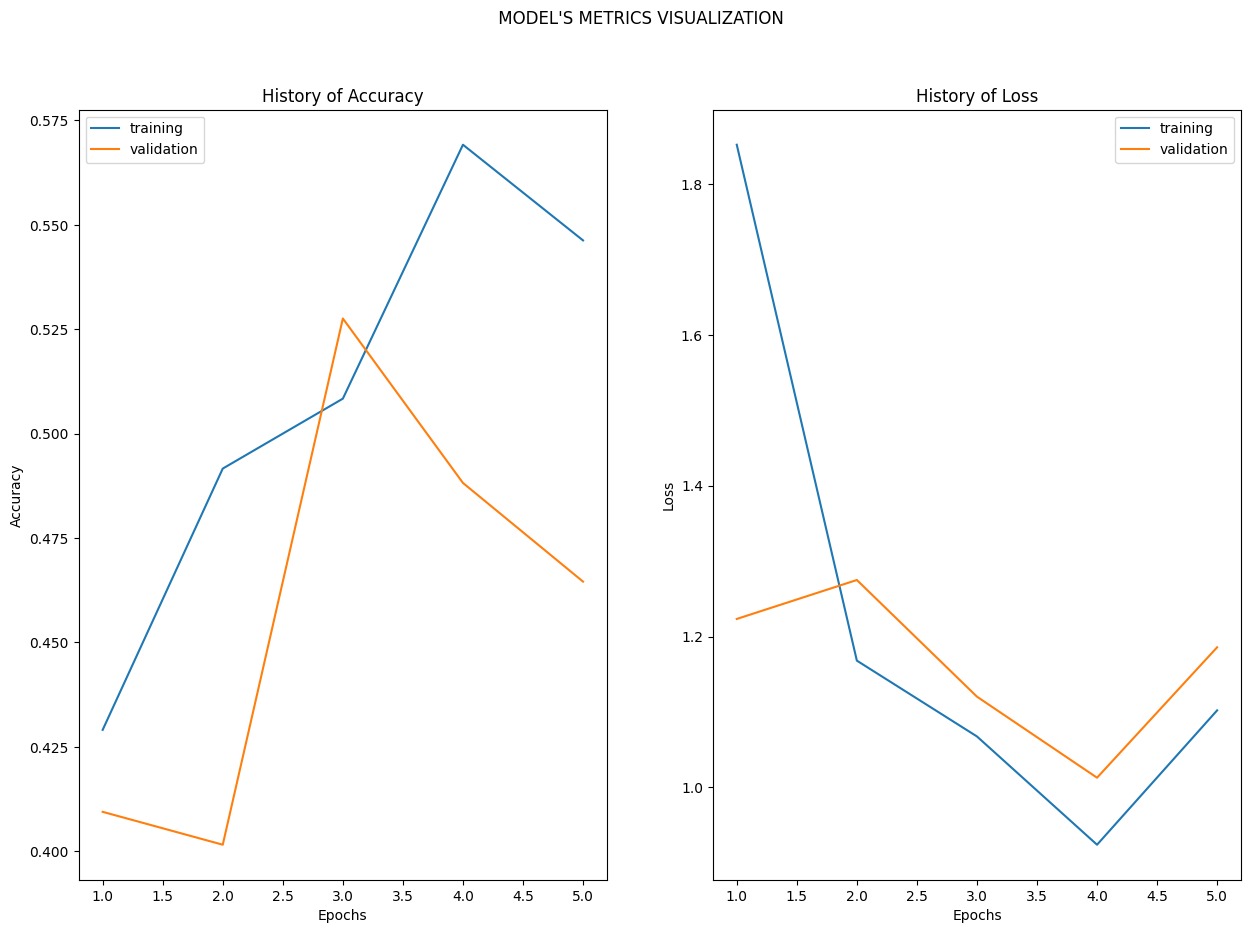

In [22]:
model = resnet()
model.build(X_train.shape)
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,5,4)

#7 Scaling up: developing a model that overfits

In [23]:
# base_model = tf.keras.applications.ResNet50(
#                 include_top=False,
#                 weights="imagenet",
#                 input_tensor=None,
#                 input_shape=imageShape,
#                 pooling=None,
#             )
# for layer in base_model.layers:
#     layer.trainable = False


In [24]:
# overfit model
def resnetOverfit():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dense(64,activation='relu'))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

    return model

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (1135, 22500)             0         
                                                                 
 dense_2 (Dense)             (1135, 128)               2880128   
                                                                 
 dense_3 (Dense)             (1135, 64)                8256      
                                                                 
 dense_4 (Dense)             (1135, 3)                 195       
                                                                 
Total params: 2,888,579
Trainable params: 2,888,579
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
71/71 [==============================] - 2s 24ms/step - loss: 1.4246 - acc: 0.5163 - val_loss: 1.0280 - val_acc: 0.5748
Epoch 2/20
71/71 [===========================

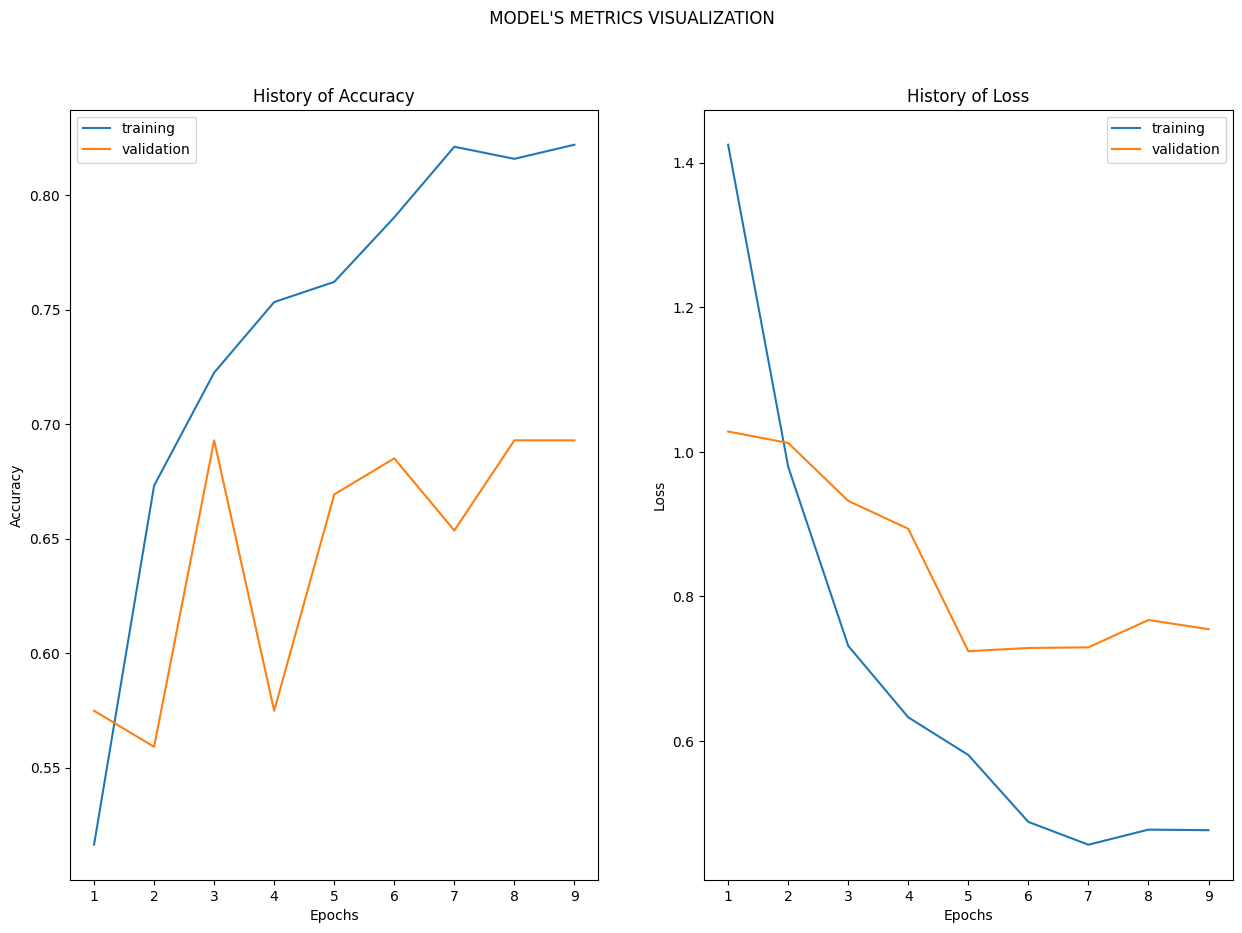

In [25]:
model = resnetOverfit()
model.build(X_train.shape)
model.summary()
fit_evaluate(model,X_train,y_train,X_test,y_test,16,20,4)

#8. Regularising your model and tuning your hyperparameters

# 8.1 Adding dropout to 'deep model 1'

To regularise a model and tuning of hyperparameters, I would need to add dropout, add more layers and add L2 regularisation. Adding a dropout layer will set input units to zero with a frequency of rate at each step during training time to prevent overfitting.(Keras, no date)

In [26]:
# deep model
def deepResnet():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    return model

In [27]:
model = deepResnet()
model.build(X_train.shape)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (1135, 22500)             0         
                                                                 
 dense_5 (Dense)             (1135, 64)                1440064   
                                                                 
 dropout (Dropout)           (1135, 64)                0         
                                                                 
 dense_6 (Dense)             (1135, 3)                 195       
                                                                 
Total params: 1,440,259
Trainable params: 1,440,259
Non-trainable params: 0
_________________________________________________________________


In [28]:
# deep = Sequential(
#     [
#         Flatten(),
#         Dense(64, activation='relu', input_shape=X_train.shape),
#         Dropout(0.5),
#         Dense(OUTPUT_CLASSES,activation='softmax')
#     ]

# )

#8.1 Adding more units to make the model wider

In [29]:
# wider model
def widerResnet():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(128,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])

    return model

In [30]:
# wider = Sequential(
#     [
#         Flatten(),
#         Dense(128, activation='relu', input_shape=X_train.shape),
#         Dropout(0.5),
#         Dense(OUTPUT_CLASSES, activation='softmax')
#     ]
# )

In [31]:
model = widerResnet()
model.build(X_train.shape)
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (1135, 22500)             0         
                                                                 
 dense_7 (Dense)             (1135, 128)               2880128   
                                                                 
 dropout_1 (Dropout)         (1135, 128)               0         
                                                                 
 dense_8 (Dense)             (1135, 3)                 387       
                                                                 
Total params: 2,880,515
Trainable params: 2,880,515
Non-trainable params: 0
_________________________________________________________________


#8.2 Adding three dense layers of 64 units and two dropout layers of 0.5 dropout rate

In [32]:
# deeper model
def deeperResnet():

    model = Sequential()

    model.add(Flatten())
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(64,activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    print(model)
    return model

#8.3 Adding a ResNet pretrained model to baseline model

In [43]:
pretrainedResnet = tf.keras.applications.ResNet50(
    include_top = False,
    weights = 'imagenet',
    input_tensor=None,
    input_shape=(150,150,3),
    pooling=None,
    classifier_activation=None
)



In [45]:
# pretrained resnet model + deep model
def pretrainedResnet():

    model = Sequential()
    model.add(pretrainedResnet)

    model.add(Flatten())
    model.add(Dense(64,activation='relu', input_shape = X_train.shape))
    model.add(Dropout(0.5))
    model.add(Dense(OUTPUT_CLASSES,activation='softmax'))

    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['acc'])
    return model

#8.4 Cross Validation

##8.4.1 K-fold Validation (deepModel)



In [34]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 20
deepModelScore = []

for i in range(k):
    print('processing fold #', i)

    model = deepResnet()
    history = model.fit(X_train, y_train,
    epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
    deepModelScore.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [35]:
deepModelScore

[0.6535432934761047,
 0.6299212574958801,
 0.6614173054695129,
 0.6929134130477905]

##8.4.2 Saving validation logs at each fold (deepModel)

In [36]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 25
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    model = deeperResnet()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [37]:
deep_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
deep_average_mae_history

[0.37320028245449066,
 0.3519243597984314,
 0.3275470584630966,
 0.32352516800165176,
 0.3144707530736923,
 0.30123767256736755,
 0.3086904138326645,
 0.29864010214805603,
 0.30409058928489685,
 0.30575191229581833,
 0.3062542527914047,
 0.29769814759492874,
 0.3042217940092087,
 0.3027839884161949,
 0.29674673825502396,
 0.29633769392967224,
 0.2954186573624611,
 0.29293882846832275,
 0.30195412784814835,
 0.29303334653377533,
 0.2928835302591324,
 0.28774256259202957,
 0.2925310805439949,
 0.29488155990839005,
 0.2908494174480438]

##8.4.3 K-fold Validation (deeperModel)

In [38]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 20
deeperModelScore = []

for i in range(k):
    print('processing fold #', i)

    model = deeperResnet()
    history = model.fit(X_train, y_train,
    epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
    deeperModelScore.append(val_mae)

processing fold # 0


KeyboardInterrupt: ignored

In [ ]:
deeperModelScore

##8.4.4 Saving validation logs at each fold (deeperModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 25
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    model = deeperResnet()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

In [ ]:
deeper_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
deeper_average_mae_history

##8.4.5 K-fold Validation (widerModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 20
widerModelScore = []

for i in range(k):
    print('processing fold #', i)

    model = widerResnet()
    history = model.fit(X_train, y_train,
    epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
    widerModelScore.append(val_mae)

In [ ]:
widerModelScore

##8.4.6 Saving validation logs at each fold (widerModel)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 25
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    model = deeperResnet()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

In [ ]:
wider_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
wider_average_mae_history

##8.4.7 K-fold Validation (pretrainedResnet)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 20
pretrainedResnetModelScore = []

for i in range(k):
    print('processing fold #', i)

    model = pretrainedResnet()
    history = model.fit(X_train, y_train,
    epochs=num_epochs, batch_size=1, verbose=0)

    val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
    pretrainedResnetModelScore.append(val_mae)

In [ ]:
pretrainedResnetModelScore

##8.4.8 Saving validation logs at each fold (pretrainedResnet)

In [ ]:
k=5
num_val_samples = len(y_train) // k
num_epochs = 25
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    model = pretrainedResnet()
    model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['mean_absolute_error'])
    history = model.fit(X_train, y_train,validation_data=(X_val,y_val),
    epochs=num_epochs, batch_size=1, verbose=0)

    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

In [ ]:
pretrainedResnet_average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
pretrainedResnet_average_mae_history